In [1]:

import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
netflix_data = pd.read_csv('Netflix.csv',encoding='latin-1', index_col = 'Title')
netflix_data.head(2)

,Genre,Tags,Languages,Country Availability,Runtime,Director,Writer,Actors,View Rating,IMDb Score,...,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,Production House,Netflix Link,Summary,Series or Movie,IMDb Votes,Image
Title,,,,,,,,,,,,,,,,,,,,,
Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Thailand,< 30 minutes,Tomas Alfredson,John Ajvide Lindqvist,"Lina Leandersson, Kåre Hedebrant, Per Ragnar, ...",R,7.9,...,57.0,"$21,22,065",12-Dec-08,04-03-2021,"Canal+, Sandrew Metronome",https://www.netflix.com/watch/81415947,A med student with a supernatural gift tries t...,Series,205926.0,https://occ-0-4708-64.1.nflxso.net/dnm/api/v6/...
HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Canada,1-2 hour,Coky Giedroyc,Caitlin Moran,"Cleo, Paddy Considine, Beanie Feldstein, Dónal...",R,5.8,...,NaN,"$70,632",08-May-20,04-03-2021,"Film 4, Monumental Pictures, Lionsgate",https://www.netflix.com/watch/81041267,"When nerdy Johanna moves to London, things get...",Movie,2838.0,https://occ-0-1081-999.1.nflxso.net/dnm/api/v6...


In [3]:
netflix_data.index = netflix_data.index.str.title()

C:\Users\ACER\AppData\Local\Temp\ipykernel_12860\3158175579.py:6: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  ax.pie(sizes, explode, label, color, '%2.2f%%')


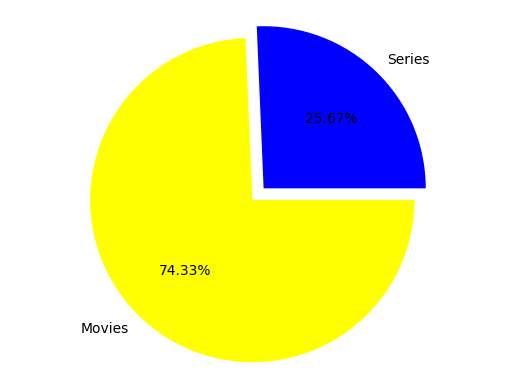

In [4]:
color = ['blue', 'yellow']
label = ['Series', 'Movies']
sizes = [netflix_data[netflix_data['Series or Movie'] == 'Series'].size, netflix_data[netflix_data['Series or Movie'] == 'Movie'].size]
explode = (0.1, 0)
fig, ax = plt.subplots()
ax.pie(sizes, explode, label, color, '%2.2f%%')
ax.axis('equal')
plt.show()

In [5]:
netflix_data.rename(columns={'View Rating':'ViewerRating'}, inplace=True)

In [6]:
Language = netflix_data.Languages.str.get_dummies(',')
Lang = Language.columns.str.strip().values.tolist()
Language = netflix_data['Languages']
Language_Count = dict()
for i in Lang:
    p = Language.str.count(i).sum()
    Language_Count[i] = int(p)
print(len(Language_Count))

184


In [7]:
Language_Count = {k: v for k, v in sorted(Language_Count.items(), key=lambda item: item[1], reverse = True)}
top_languages = {"Languages": list(Language_Count.keys()), "Count": list(Language_Count.values())}

In [8]:
fig = px.bar(pd.DataFrame(top_languages)[:10], y = 'Languages', x = 'Count', orientation = 'h', title = 'Most Available Languages', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
# fig.show()

In [9]:
Genres = netflix_data.Genre.str.get_dummies(',')
Genre = Genres.columns.str.strip().values.tolist()
Genres = netflix_data['Genre']
Genre_Count = dict()
for i in Genre:
    p = Genres.str.count(i).sum()
    Genre_Count[i] = int(p)
print(len(Genre_Count))

28


In [10]:
Genre_Count = {k: v for k, v in sorted(Genre_Count.items(), key=lambda item: item[1], reverse = True)}
top_genres = {"Genre": list(Genre_Count.keys()), "Count": list(Genre_Count.values())}

In [11]:
fig = px.bar(pd.DataFrame(top_genres)[:10], y = 'Genre', x = 'Count', orientation = 'h', title = 'Genres with maximum content', color = 'Count', color_continuous_scale = px.colors.qualitative.Prism).update_yaxes(categoryorder = 'total ascending')
# fig.show()

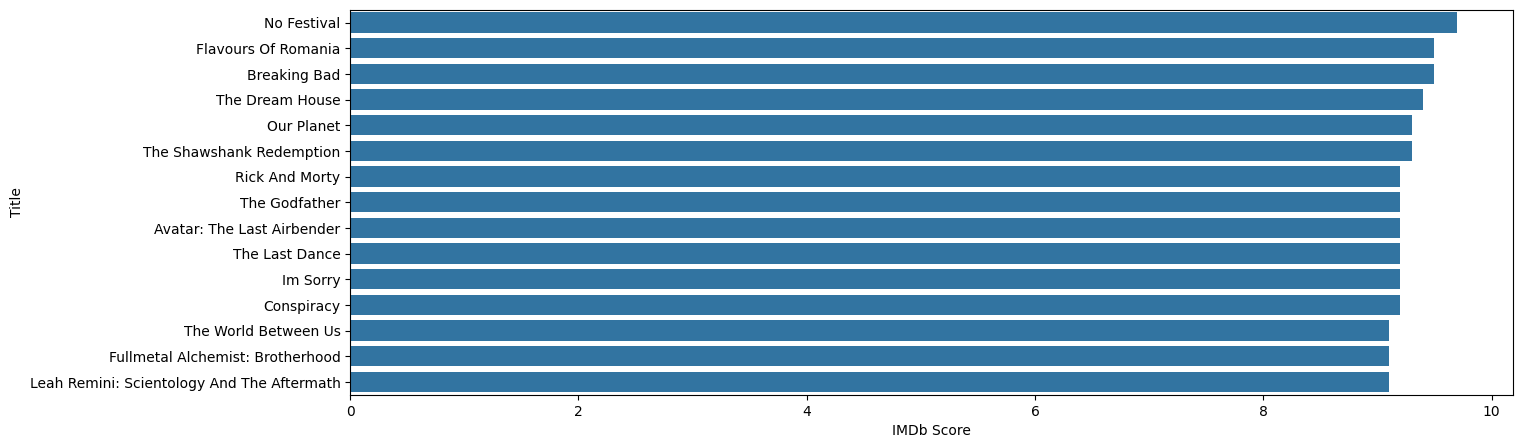

In [12]:
top_15 = netflix_data.sort_values(by = ['IMDb Score'], ascending = False).head(15)
plt.figure(figsize = (15,5))
sns.barplot(data = top_15, y = top_15.index, x = "IMDb Score")
plt.show()

In [13]:
netflix_data = netflix_data[~netflix_data.index.duplicated()]

In [14]:
netflix_data.index.duplicated().sum()

np.int64(0)

In [15]:
netflix_data.index.isnull().sum()

np.int64(0)

In [16]:
netflix_data['Genre'] = netflix_data['Genre'].astype('str')
print((netflix_data['Genre'] == 'nan').sum())

25


In [17]:
netflix_data['Tags'] = netflix_data['Tags'].astype('str')
print((netflix_data['Tags'] == 'nan').sum())

36


In [18]:
print(((netflix_data['Genre'] == 'nan') & (netflix_data['Tags'] == 'nan')).sum())
#so these two features can used to recommend movies as no movie can be left unrecommended

0


In [19]:
print(netflix_data[['IMDb Score']].describe())
netflix_data['IMDb Score'].mode()
#this feature will be used to sort the movie or series list to represent the recommended items

        IMDb Score
count  9125.000000
mean      6.955134
std       0.896501
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


0    6.6
Name: IMDb Score, dtype: float64

In [20]:
netflix_data['IMDb Score'] = netflix_data['IMDb Score'].apply(lambda x: 6.6 if x == 0 or math.isnan(x) else x)
print(netflix_data[['IMDb Score']].describe())
#since no value has suffered for change greater than 0.0003 after replacing the null values with mode value, so we replace the null values with 6.6

        IMDb Score
count  9132.000000
mean      6.954862
std       0.896212
min       1.600000
25%       6.500000
50%       7.000000
75%       7.500000
max       9.700000


In [21]:
netflix_data['Actors'] = netflix_data['Actors'].astype('str')
netflix_data['ViewerRating'] = netflix_data['ViewerRating'].astype('str')

In [22]:
def prepare_data(x):
        return str.lower(x.replace(" ", ""))

In [23]:
new_features = ['Genre', 'Tags', 'Actors', 'ViewerRating']
selected_data = netflix_data[new_features]

In [24]:
for new_feature in new_features:
    selected_data.loc[:, new_feature] = selected_data.loc[:, new_feature].apply(prepare_data)
selected_data.index = selected_data.index.str.lower()
selected_data.index = selected_data.index.str.replace(" ",'')
selected_data.head(2)

,Genre,Tags,Actors,ViewerRating
Title,,,,
letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r
howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r


In [25]:
def create_soup(x):
    return x['Genre'] + ' ' + x['Tags'] + ' ' +x['Actors']+' '+ x['ViewerRating']

In [35]:
selected_data = selected_data.copy()
selected_data['soup'] = selected_data.apply(create_soup, axis = 1)
selected_data.head(2)

,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [27]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(selected_data['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [28]:
selected_data.reset_index(inplace = True)
selected_data.head(2)

,Title,Genre,Tags,Actors,ViewerRating,soup
0,letsfightghost,"crime,drama,fantasy,horror,romance","comedyprogrammes,romantictvcomedies,horrorprog...","linaleandersson,kårehedebrant,perragnar,henrik...",r,"crime,drama,fantasy,horror,romance comedyprogr..."
1,howtobuildagirl,comedy,"dramas,comedies,filmsbasedonbooks,british","cleo,paddyconsidine,beaniefeldstein,dónalfinn",r,"comedy dramas,comedies,filmsbasedonbooks,briti..."


In [29]:
indices = pd.Series(selected_data.index, index=selected_data['Title'])
indices

Title
letsfightghost                              0
howtobuildagirl                             1
thecon-heartist                             2
glebokawoda                                 3
onlyamother                                 4
                                         ... 
13goingon30                              9127
life2.0                                  9128
brandnewday                              9129
danielarends:blessuretijd                9130
dreamworkshappyholidaysfrommadagascar    9131
Length: 9132, dtype: int64

In [30]:
result = 0
def get_recommendations(title, cosine_sim):
    global result
    title=title.replace(' ','').lower()
    idx = indices[title]
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores of the 50 most similar movies
    sim_scores = sim_scores[1:51]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    result =  netflix_data.iloc[movie_indices]
    result.reset_index(inplace = True)
    return result

In [31]:
df = pd.DataFrame()
movienames = ['Annabelle Comes Home','The Nun', 'Insidious: The Last Key', 'Conjuring 2', 'Insidious: Chapter 3']
languages = ['English', 'Hindi']
for moviename in movienames:
    get_recommendations(moviename,cosine_sim2)
    for language in languages:
        df = pd.concat([result[result['Languages'].str.count(language) > 0], df], ignore_index=True)
df.drop_duplicates(keep = 'first', inplace = True)
df.sort_values(by = 'IMDb Score', ascending = False, inplace = True)

In [32]:
print(df.shape)
print(df.head())

(118, 22)
             Title                             Genre  \
114     The Others         Horror, Mystery, Thriller   
50   The Conjuring         Horror, Mystery, Thriller   
201    Conjuring 2         Horror, Mystery, Thriller   
169     Hereditary  Drama, Horror, Mystery, Thriller   
105          Split                  Horror, Thriller   

                                                  Tags         Languages  \
114  20th Century Period Pieces,Thrillers,Mysteries...           English   
50   Horror Films,Thrillers,Supernatural Horror Fil...    English, Latin   
201  Horror Films,Supernatural Horror Films,Films B...           English   
169  Supernatural Horror Movies,Horror Movies,Teen ...  English, Spanish   
105  Psychological Thrillers,Horror Movies,Thriller...           English   

                                  Country Availability   Runtime  \
114  Italy,Sweden,Switzerland,Turkey,Iceland,India,...  1-2 hour   
50   France,Belgium,Lithuania,Switzerland,United Ki...  1-2 